# Assignment
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training is already uploaded along

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## Load *Dataset*
Load data from the given pickle file

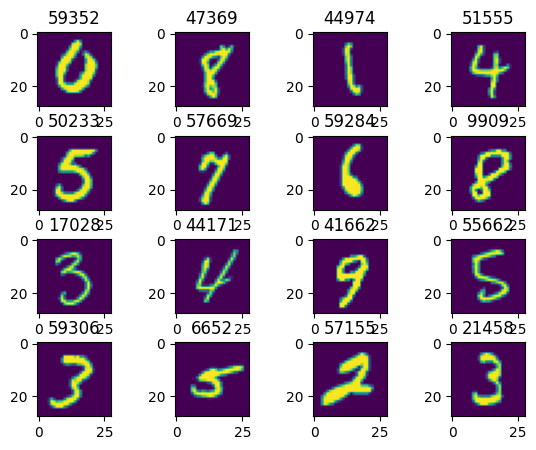

In [2]:

data_file="MNIST_data.pkl"
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']
m=60000 #number of images available for training and testing
n=784   #number of inputs
N=30000 
h=256   #hidden layer
#this is just to see what normalization does to original images
index=np.zeros(16,dtype=np.int32)
random.seed(20)
for i in range (0,16,1):
    index[i]=random.randint(0,m)
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    plt.title(index[i])
    plt.imshow(X[index[i]].reshape(28,28))
# normalize
StandDev=np.std(X,axis=0,keepdims=True)
Mean=np.mean(X,axis=0,keepdims=True)
X=(X-Mean)/(StandDev+1e-7)
# Split into X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.5)
# you can use stratified splitting from sklearn library


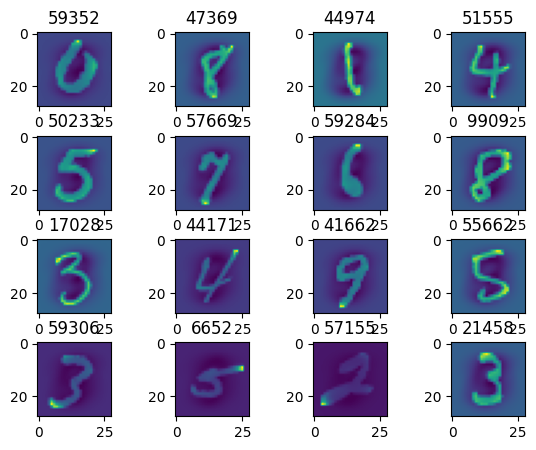

In [3]:
# display a 4x4 grid, 
index=np.zeros(16,dtype=np.int32)
random.seed(20)
for i in range (0,16,1):
    index[i]=random.randint(0,m)
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    plt.title(index[i])
    plt.imshow(X[index[i]].reshape(28,28)) 
# choose 16 images randomly, display the images as well as corresponding labels

## Building up parts of our classifier

**Activation functions**

In [4]:
def relu(z):
    """
    Arguments:
    z -- A scalar or numpy array.
    Return:
    relu func applied to each element of z
    """
    return np.maximum(0,z)
def softmax(z):
    """
    returns computed probabilitites for each element in batch separately
    input: (N, 10)
    output: (N, 10)
    """
    reduced=z-np.max(z,axis=1,keepdims=True)
    exponentiated=np.exp(reduced)
    denominator=np.sum(exponentiated,axis=1,keepdims=True)
    return exponentiated/denominator

**Notes about the Neural Network** 
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

In [29]:
def init_params(layer1,layer2,layer3):
    """
    ideally it should take the size of all the layers and 
    should return the initialized weights.
    """
    np.random.seed(785)
    w1=0.01*np.random.randn(layer1*layer2) #784*256
    np.random.seed(785)
    w2=0.01*np.random.randn(layer2*layer3) #256*10
    w1=w1.reshape(layer1,layer2)
    w2=w2.reshape(layer2,layer3)
    b1=np.zeros(layer2,dtype=np.float64)
    b1=b1.reshape(layer2,1)
    b2=np.zeros(layer3,dtype=np.float64)
    b2=b2.reshape(layer3,1)
    return w1,b1,w2,b2


**Forward Propagation**

In [30]:
def forward_propg(X,w1,b1,w2,b2):
    """
    X: input data
    returns: logits, output of each layer z1,z2,a1,a2
    """
    t=np.matmul(X,w1)
    z1=t.transpose()+b1
    z1=z1.transpose()
    a1=relu(z1)
    p=np.matmul(a1,w2)
    z2=p.transpose()+b2
    z2=z2.transpose()
    a2=softmax(z2) #a2 are basically our logits
    return z1,z2,a1,a2

**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [31]:
def backward_propg(w1,w2,b1,b2,X,y,z1,z2,a1,a2,alpha,h):
    """
    should update the weights and return updated weights
    """
    dL_dw1=np.zeros((784,h),dtype=np.float64)
    dL_dw2=np.zeros((h,10),dtype=np.float64)
    dL_db1=np.zeros((h,1),dtype=np.float64)
    dL_db2=np.zeros((10,1),dtype=np.float64)
    dL_dz2=np.divide(a2,N)
    for i in range(0,N,1):
        dL_dz2[i][y[i]]-=1/N
    dL_dw2=np.matmul(a1.transpose(),dL_dz2)
    dL_db2=np.sum(dL_dz2,axis=0,keepdims=True)
    dL_db2=dL_db2.transpose()
    dL_da1=np.matmul(dL_dz2,w2.transpose())
    dL_dz1=dL_da1*np.sign(z1)
    dL_db1=np.sum(dL_dz1,axis=0,keepdims=True)
    dL_db1=dL_db1.transpose()
    dL_dw1=np.matmul(X.transpose(),dL_dz1)
    w1=w1-alpha*dL_dw1
    b1=b1-alpha*dL_db1
    w2=w2-alpha*dL_dw2
    b2=b2-alpha*dL_db2    
    return w1,b1,w2,b2

In [32]:
def cost_func(a2,y):
    """
    calculate loss to check whether it is decreasing at each epoch or not
    one can return this in backward propagation as well
    """
    t=0
    for i in range (0,N,1):
        t=t-math.log(a2[i][y[i]]+1e-7)
    t=t/N
    return t


## Integrate everything

In [33]:
def train(X, y, hidden_nodes, epochs=1000, lr=0.5):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    # initialize weights.
    w1,b1,w2,b2=init_params(784,hidden_nodes,10)
    cost=np.zeros(epochs+1,dtype=np.float64)
    # forward propagation
    z1,z2,a1,a2=forward_propg(X,w1,b1,w2,b2)
        # print cost at every 100 or so iterations
    cost[0]=cost_func(a2,y)
        #if (i%100==0):
    print (0," ",cost[0])
    i=1
    while(i<epochs):
        w1,b1,w2,b2=backward_propg(w1,w2,b1,b2,X,y,z1,z2,a1,a2,lr,hidden_nodes)
        # forward propagation
        z1,z2,a1,a2=forward_propg(X,w1,b1,w2,b2)
        # print cost at every 100 or so iterations
        cost[i]=cost_func(a2,y)
        if(math.fabs(cost[i]-cost[i-1])<1e-9):
                break
        #if (i%100==0):
        print (i," ",cost[i])
        # backward propagation
        if(cost[i]>cost[i-1] and lr>1e-7):
            i=i-1
            while(cost[i+1]>cost[i] and lr>1e-7):
                lr=lr/2
                w1,b1,w2,b2=backward_propg(w1,w2,b1,b2,X,y,z1,z2,a1,a2,lr,hidden_nodes)
                z1,z2,a1,a2=forward_propg(X,w1,b1,w2,b2)
                cost[i+1]=cost_func(a2,y)
                if(cost[i+1]-cost[i]<1e-7):
                    break
        i=i+1
    print(i," ",cost[i])
    return w1,b1,w2,b2,cost

In [34]:
#storing updated values of weights and biases
nw1,nb1,nw2,nb2,cost=train(X_train,y_train,h,epochs=1000,lr=0.5)
#I have chosen the above value of learning rate to increase the accuracy(>80%)
#using lr=1e-5 was giving low accuracy of 12%


0   2.30160989525454
1   2.2567170627279136
2   2.2030717341222887
3   2.1202760704944352
4   1.9886512798554872
5   1.8039733133551394
6   1.5920923361399706
7   1.3819700918208944
8   1.1857855513469908
9   1.0213596759989945
10   0.8934538776564244
11   0.7903915154958171
12   0.7045607240834113
13   0.634255545606378
14   0.5779906099669261
15   0.5330260409047975
16   0.49657860318042485
17   0.46654885073681424
18   0.4414237514514421
19   0.42010773136800206
20   0.4017929167346889
21   0.38587111233803617
22   0.37189707919939263
23   0.35951511424151406
24   0.34845169762940864
25   0.3384926199311737
26   0.32945385557260537
27   0.3212002406393484
28   0.31362433320087024
29   0.3066203422993999
30   0.30012263010874324
31   0.2940670475909562
32   0.28839501243270255
33   0.2830620436965239
34   0.27803319064294846
35   0.2732850675267111
36   0.2687842011212459
37   0.2645050313847623
38   0.26042589025083074
39   0.25653315988537473
40   0.2528070994364643
41   0.24923483

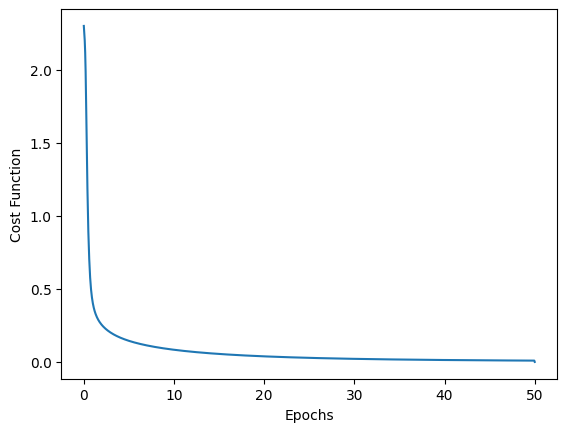

In [35]:
#plotting the cost vs epoch graph to see effeciency of learning rate
xplot=np.linspace(0,50,1001)
plt.plot(xplot,cost)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.show()

In [36]:
def predict(X,nw1,nb1,nw2,nb2):
    """
    returns the prediction in [0,9] for each element in X
    """
    z1,a1,z2,a2=forward_propg(X,nw1,nb1,nw2,nb2)
    predictions=np.zeros(N,dtype=np.int32)
    for i in range (0,N,1):
        predictions[i]=a2[i].argmax()
    return predictions
p=predict(X_test,nw1,nb1,nw2,nb2)

In [37]:
def accuracy(predictions, y):
    """
    prints % accuracy
    """
    correct=0
    for i in range (0,N,1):
        if(predictions[i]==y[i]):
            correct+=1
    return (correct/N)*100
acc=accuracy(p,y_test)
print(acc,"%")

97.01333333333334 %


### Save as pickle

In [14]:
import pickle
import random

roll_num = "22b0428" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': nw1, # layer 0 weight (784, z)
    'layer_0_bias': nb1, # layer 0 bias (z, 1)
    'layer_1_wt': nw2, # layer 1 weight (z, 10)
    'layer_1_bias': nb2 # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)